In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


# Part 1: Prepare the Data

Read myopia.csv into a Pandas DataFrame.

Remove the "MYOPIC" column from the dataset.

Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!

Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [2]:
file = 'myopia.csv'
df = pd.read_csv(file)

In [3]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [11]:
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [15]:
new_df = pd.DataFrame(scaled_data, columns=X.columns)
new_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


# Part 2: Apply Dimensionality Reduction

Perform dimensionality reduction with PCA. How did the number of the features change?

Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.

Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [25]:
 # Initialize PCA model
pca = PCA(n_components=.9)

myopia_pca = pca.fit_transform(new_df)

In [26]:
# Transform PCA data to a DataFrame
myopia_df_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7", "principal component 8", "principal component 9", "principal component 10"]
)
myopia_df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [28]:
# Fetch the explained variance
pca.explained_variance_ratio_ 

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [31]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_df_pca)

In [32]:
 # Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

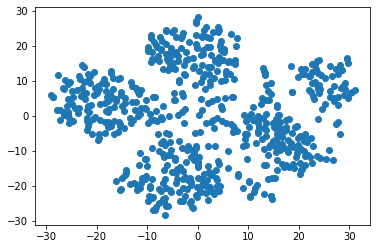

In [33]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [36]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,8652.000000
1,2,7497.115123
2,3,6732.095466
3,4,6362.286058
4,5,6083.180361
5,6,5817.591226
6,7,5634.336407
7,8,5434.664962
8,9,5295.164517
9,10,5118.628831


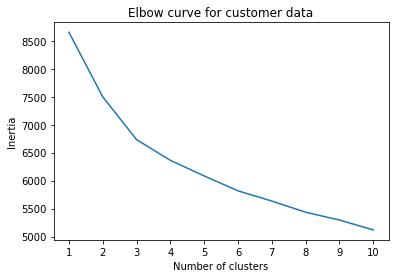

In [35]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

The elbow of the curve appears to be at K = 3

# Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?